## Bob's Burgers Script Topic Modeling

Using scripts for seasons 1-3, perform topic modeling to see what we get.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Web Scraping and Data Cleaning

In [3]:
import requests
from bs4 import BeautifulSoup

# get urls for first 5 seasons
pages = []
script_num = 20911

while script_num < 20999:
    url_part1 = "https://transcripts.foreverdreaming.org/viewtopic.php?f=428&t="
    url = url_part1 + str(script_num) 

    pages.append(requests.get(url))

    script_num += 1


In [4]:
# There are a total of 88 episodes from seasons 1-5
len(pages) # sanity check

88

In [12]:
# data cleaning
attribute_num = 135012
scripts = []
for page in pages: 
    attribute_str = "p" + str(attribute_num)  # there is a different id number for each script within html

    soup = BeautifulSoup(page.content, "html.parser")
    results = soup.find(id=attribute_str)
    lines = results.find_all("p")

    script = " ".join([line.text for line in lines]) # make each script one string
    script = script.replace("♪","")
    script = script.replace("\n", "")
    scripts.append(script) # add each script to get a list of scripts for seasons 1-3

    attribute_num += 1


In [13]:
len(scripts)

88

In [14]:
# peek at last script
# there's some odd characters such as a music note
scripts[44]

'my recreation league angel, Gene Belcher! They\'re baseball pants. Well, they go great with this top. It\'s also called a jersey, Gene. No. Ease up, everybody, back off. It\'s his first game. Oh! This is so exciting! I\'ll show you exciting. Hi-ya! I\'ve got armor for my ding-dong! Come on. That\'s not how you hit a crotch with a baseball bat. This is how you hit a crotch with a baseball bat. (grunts) Ha-ha-ha! What doesn\'t break my testicles only makes them stronger! Wow, Gene is really athletic. I love baseball: The pizza parties, the spiky shoes, the parade at the end of the season where we ride on a float. How\'s my wave? Hi... Hi... Hey, Teddy, do you want an espresso before we close up? A what? An espresso. Huh? Whoa, look at that. Yeah, it was a little pricey, but it\'s an investment, right? Someone comes in for a burger, they\'ll say, "Oh, Bob, finally you\'re selling espresso." Oh, Bobby, it\'s like that hot plate you bought. You had big dreams for that. Where is it now? It\

In [15]:
# save data to file
txtfile = open("bb_scripts_file.txt","w")
for script in scripts:
    txtfile.write(script + "\n")
txtfile.close()

In [16]:
# can also get script from saved file
scripts = []
with open("bb_scripts_file.txt", "r", encoding="UTF-8") as inpt:
        for episode in inpt:
            scripts.append(episode) 

len(scripts)

88

In [17]:
scripts[44]

'my recreation league angel, Gene Belcher! They\'re baseball pants. Well, they go great with this top. It\'s also called a jersey, Gene. No. Ease up, everybody, back off. It\'s his first game. Oh! This is so exciting! I\'ll show you exciting. Hi-ya! I\'ve got armor for my ding-dong! Come on. That\'s not how you hit a crotch with a baseball bat. This is how you hit a crotch with a baseball bat. (grunts) Ha-ha-ha! What doesn\'t break my testicles only makes them stronger! Wow, Gene is really athletic. I love baseball: The pizza parties, the spiky shoes, the parade at the end of the season where we ride on a float. How\'s my wave? Hi... Hi... Hey, Teddy, do you want an espresso before we close up? A what? An espresso. Huh? Whoa, look at that. Yeah, it was a little pricey, but it\'s an investment, right? Someone comes in for a burger, they\'ll say, "Oh, Bob, finally you\'re selling espresso." Oh, Bobby, it\'s like that hot plate you bought. You had big dreams for that. Where is it now? It\

### Data Processing

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy import linalg

vect = CountVectorizer(stop_words="english")
transformed_data = vect.fit_transform(scripts).todense()


In [66]:
# different stop words
import spacy

spacy_nlp = spacy.load("en_core_web_sm")
spacy_stopwords = list(spacy_nlp.Defaults.stop_words)
spacy_stopwords[:5]


['latter', 'four', 'twenty', 'could', 'using']

In [70]:
vect_spacy = CountVectorizer(stop_words=spacy_stopwords)
transformed_data = vect_spacy.fit_transform(scripts).todense()

/Users/kennedy/opt/miniconda3/envs/ml-env/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


In [71]:
words = np.array(vect_spacy.get_feature_names_out())
print(len(words))
print(words[::500])

8863
['00' 'baldness' 'buchanan' 'cleaner' 'dating' 'electrocuted' 'flossing'
 'hacking' 'insufferable' 'liquor' 'monologues' 'panky' 'professionals'
 'ropes' 'sissy' 'stolen' 'tinkle' 'wallflower']


In [90]:
word_count = [vect.vocabulary_[val] for val in words[100::700]]
pd.DataFrame({"Term":words[100::700], "Count":word_count})

,Term,Count
0,access,100
1,boats,799
2,cleaner,1500
3,discerning,2196
4,finders,2896
5,haw,3594
6,kooks,4294
7,monologues,4995
8,phony,5695
9,revolution,6397


In [72]:
U, S, V_t = linalg.svd(transformed_data, full_matrices=False)

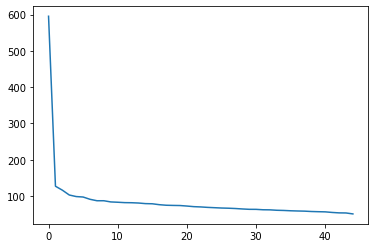

In [73]:
# plot singular values
plt.plot(S)

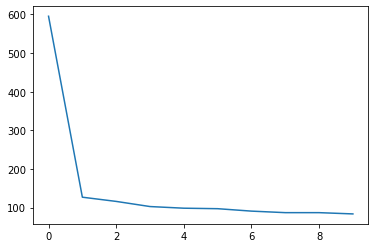

In [74]:
# first singular value contains most of the information
plt.plot(S[:10])

In [59]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [words[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [75]:
show_topics(V_t[:10])

['005 33 restroom batteries bistro cemetery scenic outlets',
 'tina jimmy dance got tammy zeke school jr',
 'jimmy bob tina ha gonna right dance jr',
 'uh yeah la boom chet oh kids christmas',
 'ha tina shark teddy ok dad jairo like',
 'oh family dad gonna room louise chuck pam',
 'chet christmas day dad la ll nadine love',
 'mickey fun okay dad boom weina dork want',
 'right yeah like cow burger dad know courtney',
 'toilet ll uh bob party linda love tina']